In [ ]:
!pip install pycaret[full]
import pycaret
pycaret.__version__

from pycaret.classification import *
import pandas as pd

!kaggle datasets download -d shivamb/netflix-shows
!unzip netflix-shows.zip


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: netflix_titles.csv      


In [ ]:
data = pd.read_csv('netflix_titles.csv')

s = setup(data, target = 'type', session_id = 123, use_gpu = True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"Movie: 0, TV Show: 1"
4,Original data shape,"(8807, 12)"
5,Transformed data shape,"(8807, 28)"
6,Transformed train set shape,"(6164, 28)"
7,Transformed test set shape,"(2643, 28)"
8,Numeric features,1
9,Categorical features,10


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9987,1.0000,0.9987,0.9987,0.9987,0.9969,0.9969,0.4010
knn,K Neighbors Classifier,0.9935,0.9963,0.9935,0.9936,0.9935,0.9846,0.9847,0.3350
ridge,Ridge Classifier,0.9766,1.0000,0.9766,0.9775,0.9763,0.9434,0.9451,0.3500
dt,Decision Tree Classifier,0.9012,0.8375,0.9012,0.8379,0.8637,0.6818,0.6820,0.2860
svm,SVM - Linear Kernel,0.7686,0.9821,0.7686,0.6628,0.6988,0.4969,0.4969,0.3280
et,Extra Trees Classifier,0.7187,1.0000,0.7187,0.7702,0.6148,0.0928,0.1674,0.4900
rf,Random Forest Classifier,0.7104,1.0000,0.7104,0.6748,0.5971,0.0565,0.0924,0.5520
catboost,CatBoost Classifier,0.6976,0.9990,0.6976,0.6070,0.5748,0.0066,0.0345,19.4610
ada,Ada Boost Classifier,0.6963,0.5003,0.6963,0.5152,0.5718,0.0007,0.0061,0.2760
gbc,Gradient Boosting Classifier,0.6963,0.9761,0.6963,0.5152,0.5718,0.0007,0.0061,0.5620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

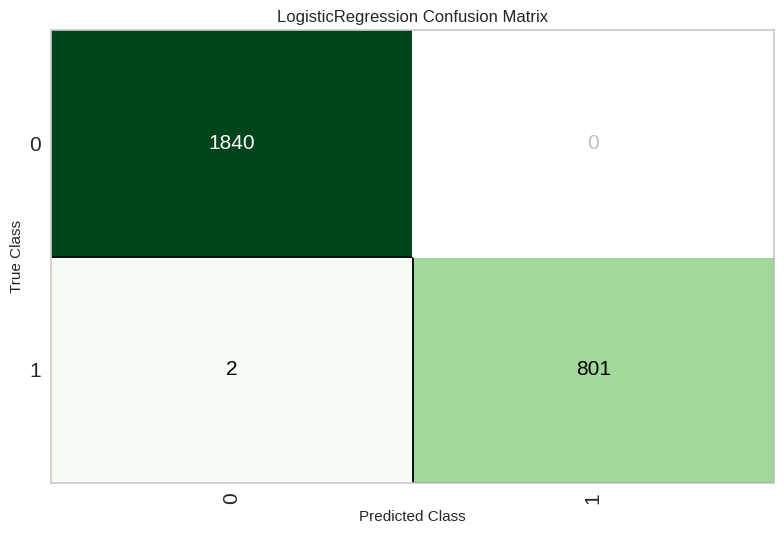

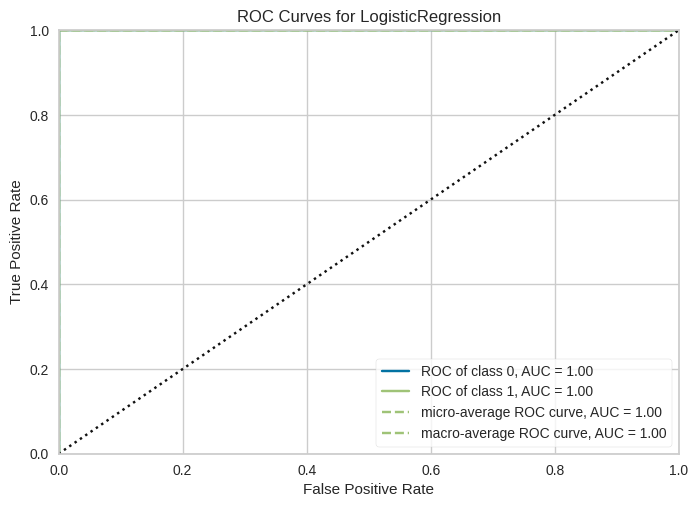

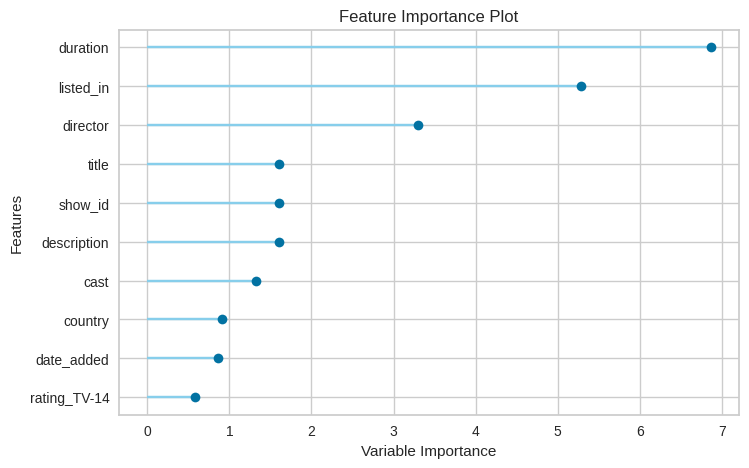

In [ ]:

plot_model(best, plot = 'confusion_matrix')
plot_model(best, plot = 'auc')
plot_model(best, plot = 'feature')



In [ ]:
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
holdout_pred = predict_model(best)
print(holdout_pred.head())

save_model(best, 'my_netflix_model')

loaded_best_pipeline = load_model('my_netflix_model')

predictions = predict_model(loaded_best_pipeline, data=data)
print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9992,1.0000,0.9992,0.9992,0.9992,0.9982,0.9982


     show_id                               title              director  \
641     s642                    Sisters on Track                   NaN   
3188   s3189  A Cinderella Story: Christmas Wish     Michelle Johnston   
8639   s8640                             Tukaram  Chandrakant Kulkarni   
6003   s6004                    24 Hours to Live            Brian Smrz   
8224   s8225                         The Brawler           Ken Kushner   

                                                   cast  \
641                                                 NaN   
3188  Laura Marano, Gregg Sulkin, Isabella Gomez, Jo...   
8639  Jitendra Joshi, Prateeksha Lonkar, Sharad Ponk...   
6003  Ethan Hawke, Xu Qing, Paul Anderson, Rutger Ha...   
8224  Zach McGowan, Amy Smart, Joe Pantoliano, Burt ...   

                                 country         date_added  release_year  \
641                                  NaN      June 24, 2021          2021   
3188                       United States   Dec

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9994,1.0000,0.9994,0.9994,0.9994,0.9987,0.9987


  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water              NaN   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans              NaN   
4      s5           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021     

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True
